  ##                                 <font color=blue>  Machine Learning Challenge </font>

#### Procedure
1. Load the data
2. Analyze and visualize the dataset
3. Model training.
4. Model Evaluation.
5. Testing the model.

### Importing all required packages and loading data

First,I’ve imported some important packages for the assignment.

- Numpy - computational operations.
- Matplotlib and seaborn - Data visualization.
- Pandas - to load data from CSV file.

In [21]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

1. Loaded the data using pd.read_csv() and set the column name as per the iris data information.
2. Pd.read_csv reads CSV files
3. **df.head()** only shows the first 5 rows from the data set table.

In [22]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels'] 
df = pd.read_csv('iris.data', names=columns)
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Analyzing and visualizing the dataset using describe and seaborn

-  **df.describe()** gives descriptions about the data, like average length and width, minimum value, maximum value, the 25%, 50%, and 75% distribution value, etc.



In [23]:
# Basic statistical analysis about the data
df.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### TASK 1 - Scatter Plotting using seaborn

I just try to find some new feature with the help of existing features. 
Taking difference of each feature with each other to get some more information and visualized it by using plots.

In [24]:
df['Sepal Petal_len_diff'] = df['Sepal length'] - df['Petal length']
df['Sepal Petal_width_diff'] = df['Sepal width'] - df['Petal width']
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels,Sepal Petal_len_diff,Sepal Petal_width_diff
0,5.1,3.5,1.4,0.2,Iris-setosa,3.7,3.3
1,4.9,3.0,1.4,0.2,Iris-setosa,3.5,2.8
2,4.7,3.2,1.3,0.2,Iris-setosa,3.4,3.0
3,4.6,3.1,1.5,0.2,Iris-setosa,3.1,2.9
4,5.0,3.6,1.4,0.2,Iris-setosa,3.6,3.4


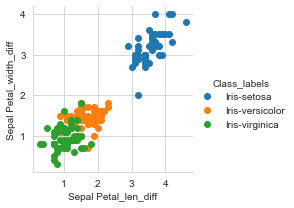

In [25]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Class_labels').map(plt.scatter,'Sepal Petal_len_diff','Sepal Petal_width_diff').add_legend()
plt.show()

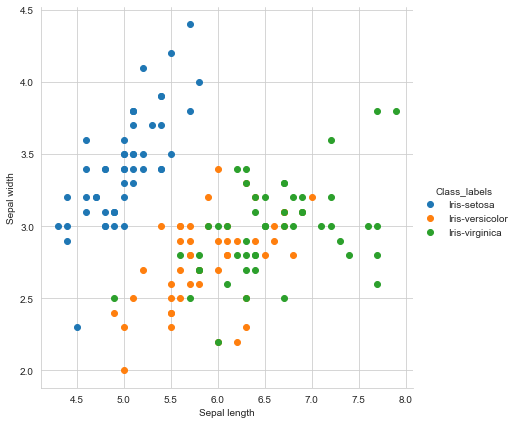

In [26]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue ="Class_labels",
              height = 6).map(plt.scatter,
                              'Sepal length',
                              'Sepal width').add_legend()

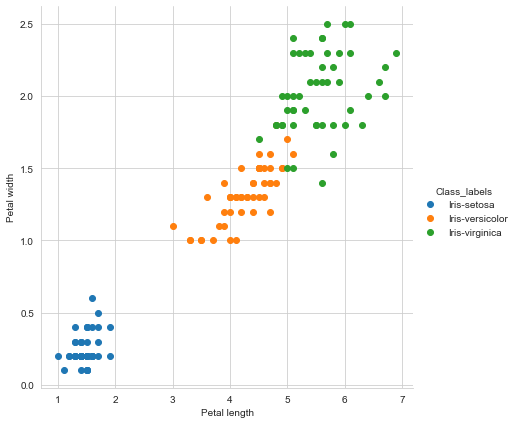

In [27]:
sns.FacetGrid(df, hue ="Class_labels",
              height = 6).map(plt.scatter,
                              'Petal length',
                              'Petal width').add_legend()

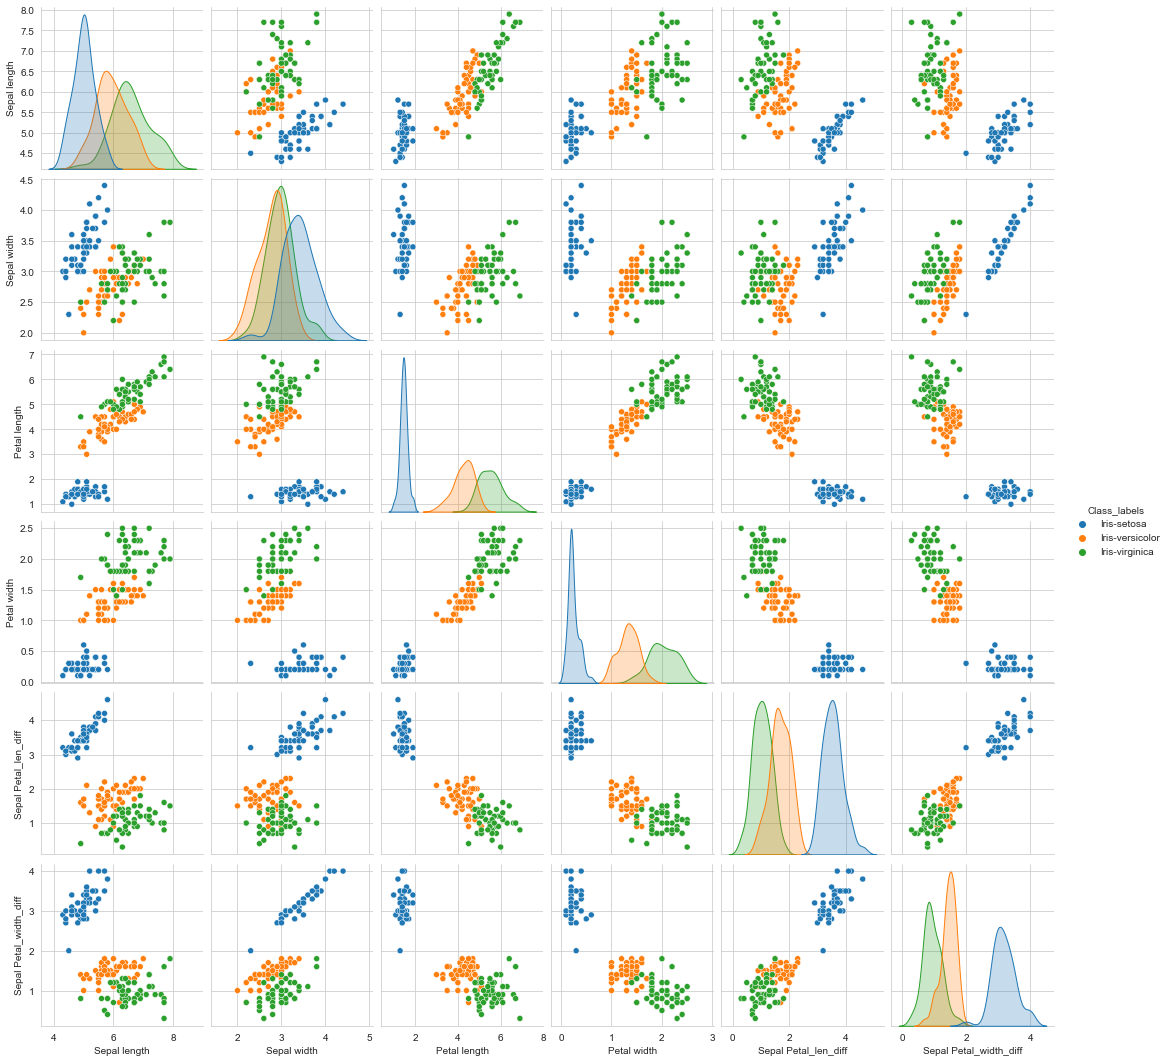

In [28]:
# Visualize the whole dataset
sns.pairplot(df, hue='Class_labels')

**OBSERVATION from visualization**:
- iris-setosa is well separated from the other two flower species.
- iris setosa is the shortest and iris virginica is the longest flower species.

### Model Training 

Using Support Vector Machine model 
- A supervised ML algo
- Used for Classification and Regression
- SVM approximates (Hyperplane) between two or more classes.
- Binary and Multiclass classification 
- I used SVM because it works comparably well when there is an understandable margin of dissociation between classes as seen from the data visualization. 

First I seperated the feature and target by assigning the specific columnUsing **train_test_split** we split the whole data into training and testing datasets.
Later I used the testing dataset to check the accuracy of the model.

In [29]:
# Separate features and target  
data = df.values
X = data[:,0:4]
Y = data[:,4]

In [30]:
# Data split to train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [42]:
# Support vector machine using sklearn
import time
from sklearn.svm import SVC


start = time.time()

svn = SVC()
svn.fit(X_train, y_train)


end = time.time()
print(end - start)



0.0018329620361328125


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

start = time.time()


rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)


end = time.time()
print(end - start)


0.1907329559326172


### Evaluation

In [50]:
import time
start = time.time()


rf_y_pred = rf_model.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, rf_y_pred))


end = time.time()
print(" Time taken by this model is:")
print(end - start)


Accuracy Score: 0.9666666666666667
 Time taken by this model is:
0.024604320526123047


Also tried Random Forest classification model but SVM is comparatively faster than RF model and has more accuracy.

In [49]:
# Predict using test dataset

import time

start = time.time()

predictions = svn.predict(X_test)

# Finding accuracy
from sklearn.metrics import accuracy_score
print('Accuracy Score:', accuracy_score(y_test, predictions))


end = time.time()
print(" Time taken by this model is:")
print(end - start)


Accuracy Score: 1.0
 Time taken by this model is:
0.002160787582397461


### Testing

In [34]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor']
